In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings

warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
tianjin = '117.4961975657171,37.86803012379458,7.296245301137998 119.8081837995413,37.9250916349774,-34.2681049860788 119.8416643486643,39.32481316399956,-31.12524274095152 117.9501096884913,39.37523731857854,39.41212136434525 117.4961975657171,37.86803012379458,7.296245301137998'



coord_list = tianjin.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [3]:
df_test = pd.read_csv("voy_path/COSCO_FOS_VRKR6_25.csv")
df_test

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-09 09:00:00,126.5569,34.0799,18.4,280.0,2022-11-08 18:56:13.959541,2022-11-08 09:55:53,2022-11-08 07:31:08,under way using engine,229.666166,452.388243
1,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-09 09:00:00,126.5261,34.0849,18.3,285.0,2022-11-08 19:01:17.137621,2022-11-08 10:01:01,2022-11-08 07:31:08,under way using engine,231.973583,453.620310
2,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-09 09:00:00,126.4980,34.0905,18.5,280.0,2022-11-08 19:06:19.944782,2022-11-08 10:05:41,2022-11-08 07:31:08,under way using engine,234.039994,464.373403
3,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-09 09:00:00,126.4644,34.0925,18.8,275.0,2022-11-08 19:11:23.235915,2022-11-08 10:11:06,2022-11-08 07:31:08,under way using engine,236.745812,480.132626
4,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-09 09:00:00,126.4325,34.0943,18.9,275.0,2022-11-08 19:16:26.088005,2022-11-08 10:16:10,2022-11-08 07:31:08,under way using engine,239.327692,488.925120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8127,35.0728,6.0,80.0,2022-11-14 15:45:30.478230,2022-11-14 06:42:40,2022-11-14 06:43:07,under way using engine,11.491783,17.159610
484,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8261,35.0755,1.4,76.0,2022-11-14 16:00:40.036669,2022-11-14 06:58:29,2022-11-14 06:49:08,under way using engine,11.791119,67.307567
485,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8294,35.0774,0.0,90.0,2022-11-14 16:41:02.521600,2022-11-14 07:39:30,2022-11-14 07:37:07,moored,12.021023,NaN
486,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-14 05:50:00,128.8293,35.0774,0.1,91.0,2022-11-14 17:26:27.030687,2022-11-14 08:24:24,2022-11-14 08:25:09,moored,12.020340,959.128537


In [7]:
# if Point(LONGITUDE, LATITUDE).within(poly):

In [8]:
df_test.sort_values(by="timestamp", ignore_index=True, inplace=True)

In [9]:
for idx in df_test.index:
    LONGITUDE = df_test.loc[idx, "longitude"]
    LATITUDE = df_test.loc[idx, "latitude"]
    heading = df_test.loc[idx, "heading"]
    speed = df_test.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
        

282


In [10]:
df_test_2 = df_test.loc[idx:,]
df_test_2.reset_index(inplace=True)

In [11]:
# df_test_2.to_csv("voy_path/COSCO_test.csv", encoding="utf-8 sig", header=True, index=False)

In [12]:
distance = 0
for idx in df_test_2.index:
    if idx != 0:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        distance += haversine(current_coord, previous_current_coord, unit="km")

In [13]:
distance

1309.6651548009452

In [14]:
1348.5265119662952 / 20

67.42632559831476

In [15]:
overall_length = 1348.5265119662952
segment_length = overall_length/20

In [16]:
overall_length = distance
segment_length = overall_length/20

In [17]:
segment_length

65.48325774004726

In [18]:
temp_accu_length = 0
segmenting_index_list = []
for idx in df_test_2.index:
    
    if idx == 0:
        previous_length = 0
    else:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        current_length = haversine(current_coord, previous_current_coord, unit="km")
        temp_accu_length += current_length
        
        if temp_accu_length >= segment_length:
            print(temp_accu_length)
#             segmenting_index_list.append(idx)
            
            
            length_error_1 = temp_accu_length - segment_length
            length_error_2 = temp_accu_length - segment_length - previous_length
            if length_error_1 > length_error_2:
                segmenting_index_list.append(idx)
            else:
                segmenting_index_list.append(idx - 1)
                
            
            temp_accu_length = 0
            
        previous_length = current_length
segmenting_index_list.append(df_test_2.index[-1])


72.62727212414536
142.95396628771988
65.51016254782469
80.9702637044401
69.41110803973697
74.1397948130414
300.7040847086696
67.848224269958
69.4899241896433
69.54566403434967
67.23005539201127
66.08107794443198
66.17147192444024
65.76426522138014


In [19]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [20]:
for idx, index in enumerate(segmenting_index_list):
    if idx == 0:
        d = df_test_2[0:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
    else:
        d = df_test_2[previous_index:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
        
    previous_index = index

72.62727212414536
142.95396628771988
65.51016254782469
80.9702637044401
69.41110803973697
74.1397948130414
300.7040847086696
67.848224269958
69.4899241896433
69.54566403434967
67.23005539201127
66.08107794443198
66.17147192444024
65.76426522138014
31.21781959915293


In [21]:
for i in range(len(segmenting_index_list)):
    d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
    mean_speed = d["speed"].mean()
    print(i, mean_speed)

0 15.317647058823528
1 17.52857142857143
2 17.32857142857143
3 18.83333333333333
4 18.6
5 19.466666666666665
6 19.75
7 18.95
8 18.176
9 18.757142857142856
10 19.6625
11 18.539130434782603
12 17.941666666666666
13 13.190909090909093
14 7.034999999999999


In [22]:
print("COSCO_FOS_25")
print("전항지 출항 시각",df_test_2.loc[df_test_2.index[0], "timestamp"])
print("부산 도착 시각",df_test_2.loc[df_test_2.index[-1], "timestamp"])

COSCO_FOS_25
전항지 출항 시각 2022-11-12 23:02:38.554501
부산 도착 시각 2022-11-14 18:47:12.361130


In [46]:
sample = pd.read_csv("voy_path/COSCO_FOS_VRKR6_20.csv")
sample.sort_values(by="timestamp", ignore_index=True, inplace=True)
for idx in sample.index:
    LONGITUDE = sample.loc[idx, "longitude"]
    LATITUDE = sample.loc[idx, "latitude"]
    heading = sample.loc[idx, "heading"]
    speed = sample.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 8:
        print(idx)
        break
sample = sample.loc[idx:,]
sample.reset_index(inplace=True)


59


In [47]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - distance // km_h) * 60)
    duration = datetime.timedelta(hours=hour,minutes=minute)
    return duration

In [48]:
# 억까 방지
busan_berth = '128.7362432822305,34.91571835540296,5.941836244531453 128.8816505843355,34.93956159255044,9.088787041386029 128.8718190496849,35.09310779849003,8.308118991212194 128.7247817257968,35.08647052441917,-9.228016031556635 128.7362432822305,34.91571835540296,5.941836244531453'
coord_list = busan_berth.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly_busan = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [49]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

In [50]:
sample

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,59,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,118.6448,38.7996,9.4,104.0,2022-09-30 23:00:41.873653,2022-09-30 13:55:21,2022-09-30 01:37:07,under way using engine,999.329431,1248.920210
1,60,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,118.8027,38.7914,9.4,93.0,2022-09-30 23:30:45.247203,2022-09-30 14:20:30,2022-09-30 02:13:08,under way using engine,986.319121,1232.660467
2,61,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,118.9141,38.7934,9.2,96.0,2022-10-01 00:01:08.988141,2022-09-30 14:56:28,2022-09-30 02:49:08,under way using engine,977.489504,1223.165075
3,62,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.0021,38.7842,8.7,108.0,2022-10-01 00:30:50.401793,2022-09-30 15:22:00,2022-09-30 03:01:09,under way using engine,970.062241,1222.831812
4,63,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,119.1093,38.7560,8.2,105.0,2022-10-01 01:00:53.259956,2022-09-30 15:59:42,2022-09-30 03:37:07,under way using engine,960.281513,1227.388613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,242,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8250,35.0774,0.1,91.0,2022-10-04 23:09:58.929655,2022-10-04 14:09:15,2022-10-04 02:07:09,moored,11.997479,957.304365
184,243,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8255,35.0773,0.0,91.0,2022-10-04 23:40:01.478256,2022-10-04 14:36:10,2022-10-04 02:31:07,moored,11.988375,NaN
185,244,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8252,35.0776,0.1,91.0,2022-10-05 02:40:17.931761,2022-10-04 17:36:10,2022-10-04 05:37:08,moored,12.020477,959.139487
186,245,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8251,35.0773,0.1,91.0,2022-10-05 03:40:24.322710,2022-10-04 18:39:15,2022-10-04 06:25:09,moored,11.986756,956.448815


In [51]:
stop_index = check_ATA(sample)

In [52]:
stop_index

176

In [53]:
sample.loc[stop_index:]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
176,235,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.9017,34.8713,13.6,310.0,2022-10-04 19:09:35.172588,2022-10-04 10:08:33,2022-10-04 10:01:07,under way using engine,13.255617,18.901258
177,236,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8445,34.9367,13.1,330.0,2022-10-04 19:39:37.994914,2022-10-04 10:29:54,2022-10-04 10:37:05,under way using engine,4.312237,5.984210
178,237,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8077,34.9980,8.2,337.0,2022-10-04 20:09:40.578791,2022-10-04 11:02:14,2022-10-04 10:55:07,under way using engine,3.334440,4.261931
179,238,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8012,35.0699,7.2,70.0,2022-10-04 20:39:44.266916,2022-10-04 11:34:12,2022-10-04 11:19:08,under way using engine,11.276009,15.148545
180,239,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8250,35.0775,0.0,91.0,2022-10-04 21:39:49.189278,2022-10-04 12:39:13,2022-10-04 12:37:09,moored,12.008588,NaN
181,240,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8251,35.0774,0.1,91.0,2022-10-04 22:09:52.793922,2022-10-04 13:00:17,2022-10-04 01:07:05,moored,11.997866,957.335246
182,241,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8254,35.0771,0.1,91.0,2022-10-04 22:39:55.350680,2022-10-04 13:33:13,2022-10-04 01:31:07,moored,11.965744,954.772172
183,242,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8250,35.0774,0.1,91.0,2022-10-04 23:09:58.929655,2022-10-04 14:09:15,2022-10-04 02:07:09,moored,11.997479,957.304365
184,243,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8255,35.0773,0.0,91.0,2022-10-04 23:40:01.478256,2022-10-04 14:36:10,2022-10-04 02:31:07,moored,11.988375,NaN
185,244,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8252,35.0776,0.1,91.0,2022-10-05 02:40:17.931761,2022-10-04 17:36:10,2022-10-04 05:37:08,moored,12.020477,959.139487


In [54]:
ATA = pd.to_datetime(sample.loc[stop_index,"timestamp"])
ATA

Timestamp('2022-10-04 19:09:35.172588')

# 감속률 적용

In [33]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = current_speed / init_seg_df["speed"].mean()
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [34]:
ddd = sample.loc[20:,:]
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,79,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.6018,38.6039,12.0,103.0,2022-10-01 09:01:39.986288,2022-09-30 23:49:21,2022-09-30 11:55:11,under way using engine,835.486409,1101.413137,2022-10-03 06:48:39.986288,2022-10-04 19:09:35.172588,1 days 12:20:55.186300
21,80,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.7434,38.5786,13.5,102.0,2022-10-01 09:31:42.894382,2022-10-01 00:23:07,2022-09-30 11:55:11,under way using engine,823.219759,1167.289195,2022-10-03 02:14:42.894382,2022-10-04 19:09:35.172588,1 days 16:54:52.278206
22,81,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.8949,38.5366,19.4,107.0,2022-10-01 10:01:44.661562,2022-10-01 00:50:33,2022-10-01 12:49:05,under way using engine,809.355773,1714.957759,2022-10-02 14:18:44.661562,2022-10-04 19:09:35.172588,2 days 04:50:50.511026
23,82,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,121.0784,38.4828,14.2,113.0,2022-10-01 10:31:47.135327,2022-10-01 01:23:40,2022-10-01 01:31:09,under way using engine,792.414860,1170.234717,2022-10-03 01:53:47.135327,2022-10-04 19:09:35.172588,1 days 17:15:48.037261
24,83,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,121.2087,38.4376,12.9,115.0,2022-10-01 11:01:50.126019,2022-10-01 01:54:15,2022-10-01 01:55:09,under way using engine,780.027173,1071.427728,2022-10-03 06:21:50.126019,2022-10-04 19:09:35.172588,1 days 12:47:45.046569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,230,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.1087,34.8488,1.6,161.0,2022-10-04 16:20:21.070551,2022-10-04 06:36:13,2022-10-04 06:37:06,under way using engine,29.599100,147.954666,2022-10-04 19:19:21.070551,2022-10-04 19:09:35.172588,0 days 00:09:45.897963
172,231,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.1043,34.8541,0.8,125.0,2022-10-04 17:09:25.539071,2022-10-04 08:03:42,2022-10-04 08:07:10,under way using engine,28.975408,289.085158,2022-10-04 23:08:25.539071,2022-10-04 19:09:35.172588,0 days 03:58:50.366483
173,232,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0964,34.8517,1.0,113.0,2022-10-04 17:39:27.899400,2022-10-04 08:30:52,2022-10-04 08:37:05,under way using engine,28.453779,227.167731,2022-10-04 22:26:27.899400,2022-10-04 19:09:35.172588,0 days 03:16:52.726812
174,233,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0814,34.8502,1.8,136.0,2022-10-04 18:09:30.569093,2022-10-04 09:06:44,2022-10-04 09:01:08,under way using engine,27.327957,121.543658,2022-10-04 20:48:30.569093,2022-10-04 19:09:35.172588,0 days 01:38:55.396505


In [35]:
ddd["eta"] = pd.to_datetime(ddd["eta"])


In [36]:
ddd["error"] = abs(ddd["ETA"] - ddd["ATA"])

In [37]:
ddd["AIS_ETA_error"] = abs(ddd["eta"] - ddd["ATA"])

In [38]:
ddd.drop(columns=["mmsi", "imo", "CAPACITY",'estimated_fuel_consumption'], inplace=True)

에러가 커졌을때는 왜 커졌는지 확인 필요할듯.

if ETA > ATA:
error = ETA - ATA
else
val = abs(ETA-ATA)


In [39]:
ddd["error"].max()

Timedelta('118 days 02:54:48.574443')

In [40]:
ddd["error"].mean()

Timedelta('4 days 09:21:15.572153923')

In [41]:
ddd.sort_values(by="error")

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,ETA,ATA,error,AIS_ETA_error
175,234,COSCO FOS,KRBNP,2022-10-04 10:00:00,129.0589,34.8418,11.1,277.0,2022-10-04 18:39:32.516242,2022-10-04 09:28:48,2022-10-04 09:37:07,under way using engine,26.052569,2022-10-04 19:04:32.516242,2022-10-04 19:09:35.172588,0 days 00:05:02.656346,0 days 09:09:35.172588
171,230,COSCO FOS,KRBNP,2022-10-04 10:00:00,129.1087,34.8488,1.6,161.0,2022-10-04 16:20:21.070551,2022-10-04 06:36:13,2022-10-04 06:37:06,under way using engine,29.599100,2022-10-04 19:19:21.070551,2022-10-04 19:09:35.172588,0 days 00:09:45.897963,0 days 09:09:35.172588
160,219,COSCO FOS,KRBNP,2022-10-04 08:00:00,128.9621,34.8258,2.5,316.0,2022-10-04 08:38:36.707444,2022-10-03 23:34:08,2022-10-03 11:25:06,under way using engine,20.613702,2022-10-04 18:06:36.707444,2022-10-04 19:09:35.172588,0 days 01:02:58.465144,0 days 11:09:35.172588
174,233,COSCO FOS,KRBNP,2022-10-04 10:00:00,129.0814,34.8502,1.8,136.0,2022-10-04 18:09:30.569093,2022-10-04 09:06:44,2022-10-04 09:01:08,under way using engine,27.327957,2022-10-04 20:48:30.569093,2022-10-04 19:09:35.172588,0 days 01:38:55.396505,0 days 09:09:35.172588
168,227,COSCO FOS,KRBNP,2022-10-04 10:00:00,129.0444,34.8247,7.6,151.0,2022-10-04 13:09:01.327977,2022-10-04 04:06:04,2022-10-04 03:49:05,under way using engine,26.086101,2022-10-04 16:15:01.327977,2022-10-04 19:09:35.172588,0 days 02:54:33.844611,0 days 09:09:35.172588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,172,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.3948,35.1330,0.3,264.0,2022-10-03 08:36:14.543227,2022-10-02 23:35:24,2022-10-02 12:13:06,under way using engine,312.254365,2022-11-12 04:33:14.543227,2022-10-04 19:09:35.172588,38 days 09:23:39.370639,0 days 11:09:35.172588
114,173,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.3977,35.1340,0.3,255.0,2022-10-03 09:06:20.649953,2022-10-03 00:05:53,2022-10-02 12:13:06,under way using engine,311.995457,2022-11-12 05:03:20.649953,2022-10-04 19:09:35.172588,38 days 09:53:45.477365,0 days 11:09:35.172588
73,132,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.0727,34.9816,0.2,231.0,2022-10-02 12:04:14.894538,2022-10-02 02:35:44,2022-10-02 12:13:06,under way using engine,341.359610,2022-12-01 06:00:14.894538,2022-10-04 19:09:35.172588,57 days 10:50:39.721950,0 days 11:09:35.172588
115,174,COSCO FOS,KRBNP,2022-10-04 08:00:00,125.4004,35.1347,0.2,239.0,2022-10-03 09:40:13.803859,2022-10-03 00:39:54,2022-10-02 12:13:06,under way using engine,311.753380,2022-12-02 03:36:13.803859,2022-10-04 19:09:35.172588,58 days 08:26:38.631271,0 days 11:09:35.172588


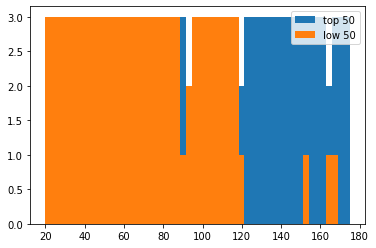

In [42]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [43]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       229
speed                                       1.7
timestamp            2022-10-04 14:09:06.757291
ETA                  2022-10-05 04:06:06.757291
error                    0 days 08:56:31.584703
remained_distance                     28.998679
Name: 170, dtype: object

In [44]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       128
speed                                      13.0
timestamp            2022-10-02 09:34:00.135688
ETA                  2022-10-03 07:35:00.135688
error                    1 days 11:34:35.036900
remained_distance                    344.538552
Name: 69, dtype: object

3. 속도 계수를 조정해보자.
- 속도 계수를 적용 안했을 때
- 속도 계수를 지금과 같이 적용했을 때
- 속도 계수를 특성에 맞게 조금씩 다르게 (뒷 부분은 속도 적용하지 않는다던가 등)
- 현재 순간 속도를 보는게 아니라, 일정 시간(약 30분 ~ 60분? 실험 필요)을 두고 평균 속도나 칼만 필터를 이용한 filtered 속도를 기반으로 속도 계수 조정
    - 속도가 그렇게 차이가 없을 것 같아 별 차이는 없을지도 모름.
- 너무 속도 변화가 크거나 속도가 낮을때 제외하는 방법
- 속도가 0일때는 어떻게 계산?


# 감속률 미적용

In [55]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [56]:
ddd = sample.loc[20:,:]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,79,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.6018,38.6039,12.0,103.0,2022-10-01 09:01:39.986288,2022-09-30 23:49:21,2022-09-30 11:55:11,under way using engine,835.486409,1101.413137,2022-10-02 16:41:39.986288,2022-10-04 19:09:35.172588,2 days 02:27:55.186300
21,80,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.7434,38.5786,13.5,102.0,2022-10-01 09:31:42.894382,2022-10-01 00:23:07,2022-09-30 11:55:11,under way using engine,823.219759,1167.289195,2022-10-02 17:11:42.894382,2022-10-04 19:09:35.172588,2 days 01:57:52.278206
22,81,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.8949,38.5366,19.4,107.0,2022-10-01 10:01:44.661562,2022-10-01 00:50:33,2022-10-01 12:49:05,under way using engine,809.355773,1714.957759,2022-10-02 17:41:44.661562,2022-10-04 19:09:35.172588,2 days 01:27:50.511026
23,82,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,121.0784,38.4828,14.2,113.0,2022-10-01 10:31:47.135327,2022-10-01 01:23:40,2022-10-01 01:31:09,under way using engine,792.414860,1170.234717,2022-10-02 16:09:47.135327,2022-10-04 19:09:35.172588,2 days 02:59:48.037261
24,83,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,121.2087,38.4376,12.9,115.0,2022-10-01 11:01:50.126019,2022-10-01 01:54:15,2022-10-01 01:55:09,under way using engine,780.027173,1071.427728,2022-10-02 16:39:50.126019,2022-10-04 19:09:35.172588,2 days 02:29:45.046569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,242,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8250,35.0774,0.1,91.0,2022-10-04 23:09:58.929655,2022-10-04 14:09:15,2022-10-04 02:07:09,moored,11.997479,957.304365,NaT,NaT,NaT
184,243,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8255,35.0773,0.0,91.0,2022-10-04 23:40:01.478256,2022-10-04 14:36:10,2022-10-04 02:31:07,moored,11.988375,NaN,NaT,NaT,NaT
185,244,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8252,35.0776,0.1,91.0,2022-10-05 02:40:17.931761,2022-10-04 17:36:10,2022-10-04 05:37:08,moored,12.020477,959.139487,NaT,NaT,NaT
186,245,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,128.8251,35.0773,0.1,91.0,2022-10-05 03:40:24.322710,2022-10-04 18:39:15,2022-10-04 06:25:09,moored,11.986756,956.448815,NaT,NaT,NaT


In [57]:
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd.sort_values(by="error")

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
175,234,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0589,34.8418,11.1,277.0,2022-10-04 18:39:32.516242,2022-10-04 09:28:48,2022-10-04 09:37:07,under way using engine,26.052569,33.291927,2022-10-04 19:19:32.516242,2022-10-04 19:09:35.172588,0 days 00:09:57.343654
174,233,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0814,34.8502,1.8,136.0,2022-10-04 18:09:30.569093,2022-10-04 09:06:44,2022-10-04 09:01:08,under way using engine,27.327957,121.543658,2022-10-04 18:49:30.569093,2022-10-04 19:09:35.172588,0 days 00:20:04.603495
173,232,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0964,34.8517,1.0,113.0,2022-10-04 17:39:27.899400,2022-10-04 08:30:52,2022-10-04 08:37:05,under way using engine,28.453779,227.167731,2022-10-04 18:19:27.899400,2022-10-04 19:09:35.172588,0 days 00:50:07.273188
172,231,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.1043,34.8541,0.8,125.0,2022-10-04 17:09:25.539071,2022-10-04 08:03:42,2022-10-04 08:07:10,under way using engine,28.975408,289.085158,2022-10-04 17:49:25.539071,2022-10-04 19:09:35.172588,0 days 01:20:09.633517
170,229,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 10:00:00,129.0736,34.8129,1.7,165.0,2022-10-04 14:09:06.757291,2022-10-04 04:58:22,2022-10-04 05:07:06,under way using engine,28.998679,136.489950,2022-10-04 17:30:06.757291,2022-10-04 19:09:35.172588,0 days 01:39:28.415297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,80,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.7434,38.5786,13.5,102.0,2022-10-01 09:31:42.894382,2022-10-01 00:23:07,2022-09-30 11:55:11,under way using engine,823.219759,1167.289195,2022-10-02 17:11:42.894382,2022-10-04 19:09:35.172588,2 days 01:57:52.278206
25,84,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,121.3499,38.3959,12.8,105.0,2022-10-01 11:31:52.958583,2022-10-01 02:27:35,2022-10-01 02:25:07,under way using engine,766.971510,1048.257719,2022-10-02 17:09:52.958583,2022-10-04 19:09:35.172588,2 days 01:59:42.214005
20,79,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,120.6018,38.6039,12.0,103.0,2022-10-01 09:01:39.986288,2022-09-30 23:49:21,2022-09-30 11:55:11,under way using engine,835.486409,1101.413137,2022-10-02 16:41:39.986288,2022-10-04 19:09:35.172588,2 days 02:27:55.186300
24,83,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-04 08:00:00,121.2087,38.4376,12.9,115.0,2022-10-01 11:01:50.126019,2022-10-01 01:54:15,2022-10-01 01:55:09,under way using engine,780.027173,1071.427728,2022-10-02 16:39:50.126019,2022-10-04 19:09:35.172588,2 days 02:29:45.046569


In [58]:
ddd['error'].mean()

Timedelta('1 days 02:55:16.150428935')

In [59]:
ddd['error'].max()

Timedelta('2 days 02:59:48.037261')

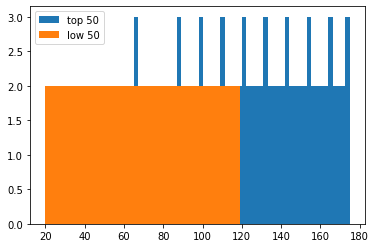

In [60]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [61]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       189
speed                                      10.1
timestamp            2022-10-03 17:07:06.181952
ETA                  2022-10-04 04:12:06.181952
error                    0 days 14:57:28.990636
remained_distance                     304.53314
Name: 130, dtype: object

In [62]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       136
speed                                       1.3
timestamp            2022-10-02 14:04:27.830712
ETA                  2022-10-03 05:07:27.830712
error                    1 days 14:02:07.341876
remained_distance                    341.278525
Name: 77, dtype: object